## Задание 1.1
1. Сгенерить выборки, соответствующие следующим распределениям:
    - Нормальное,
    - Лапласа,
    - Стьюдента,
    - Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2).
2. На каждой выборке отдельно проверить мощность и консервативность следюущих критериев:
    - Лиллиефорса, 
    - Харке-Бера, 
    - Шапиро-Улика.
    

In [94]:
from numpy import random as rand
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import time
from statsmodels.api import stats as sm

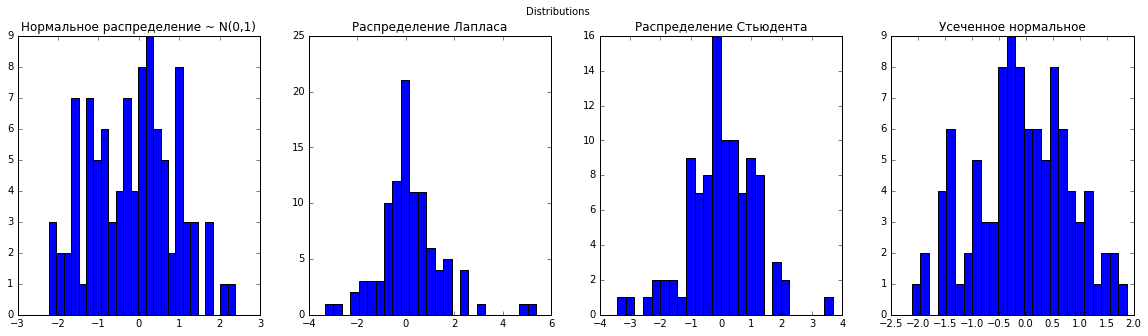

In [105]:
#task1.1 - 1
mu, sigma = 0, 1
lower, upper = -100, 2
N = 100
distributions = {'Нормальное': rand.normal(mu, sigma, size=N),
                'Лапласа': rand.laplace(mu, sigma, size=N),
                'Стьюдента' : rand.standard_t(10, size=N),
                'Усеченное' : st.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma).rvs(N)}
#plot distribution
fig, axes = plt.subplots(1,4, figsize=(5*4, 5*1))
axes[0].hist(distributions['Нормальное'], bins=25)
axes[0].set_title('Нормальное распределение ~ N(0,1)')
axes[1].hist(distributions['Лапласа'], bins=25)
axes[1].set_title('Распределение Лапласа')
axes[2].hist(distributions['Стьюдента'], bins=25)
axes[2].set_title('Распределение Стьюдента')
axes[3].hist(distributions['Усеченное'], bins=25)
axes[3].set_title('Уcеченное нормальное')
plt.suptitle('Distributions')

criterions = [sm.lilliefors, st.jarque_bera, st.shapiro]

In [106]:
#task1.1 - 2.1
for dist in distributions:
    print('{} распредление'.format(dist))
    p_values = []
    for cr in criterions:
        cr_name = str(cr).split(' ')[1]
        p_value = cr(distributions[dist])[1]
        if p_value <= 0.05:
            print('{}: Критеритий {} отклоняет нулевую гипотезу, p_value = {:.6f}'.format((p_value <= 0.05), cr_name, p_value))
        else:
            print('{}: Критеритий {} не отклоняет нулевую гипотезу, p_value = {:.6f}'.format((p_value <= 0.05), cr_name, p_value))
        p_values.append(p_value)

Нормальное распредление
False: Критеритий kstest_fit не отклоняет нулевую гипотезу, p_value = 0.438663
False: Критеритий jarque_bera не отклоняет нулевую гипотезу, p_value = 0.345978
False: Критеритий shapiro не отклоняет нулевую гипотезу, p_value = 0.306059
Лапласа распредление
True: Критеритий kstest_fit отклоняет нулевую гипотезу, p_value = 0.007925
True: Критеритий jarque_bera отклоняет нулевую гипотезу, p_value = 0.000000
True: Критеритий shapiro отклоняет нулевую гипотезу, p_value = 0.000105
Стьюдента распредление
False: Критеритий kstest_fit не отклоняет нулевую гипотезу, p_value = 0.297889
True: Критеритий jarque_bera отклоняет нулевую гипотезу, p_value = 0.046811
False: Критеритий shapiro не отклоняет нулевую гипотезу, p_value = 0.150262
Усеченное распредление
False: Критеритий kstest_fit не отклоняет нулевую гипотезу, p_value = 0.701337
False: Критеритий jarque_bera не отклоняет нулевую гипотезу, p_value = 0.530004
False: Критеритий shapiro не отклоняет нулевую гипотезу, p_va

### Вывод:
Отклонение гипотезы зависит от случайности генерации выборки, при разных генерациях выдаются разные ответы для распредленрия Лапласа и Стьюдента.

Все критерии отклоняют гипотезу нормалньости для распредления Лапласа и не отклоняюют ее для нормального и усеченного нормального распредения.

Для распредления Стьюдента критерии Лиллиефорса и Шапиро не отклоняют гипотезу нормальности, а критерий Харки-Бера оказался более мощным и отклонил нулевую гипотезу.
